In [1]:
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

dataset = xr.open_dataset('FY4B/FY4B-_AGRI--_N_DISK_1330E_L2-_CFR-_MULT_NOM_20230509143000_20230509144459_4000M_V0001.NC')
dataset

<xarray.Dataset>
Dimensions:                              (y: 2748, x: 2748, o: 1)
Coordinates:
  * y                                    (y) float32 0.0 1.0 ... 2.747e+03
  * x                                    (x) float32 0.0 1.0 ... 2.747e+03
Dimensions without coordinates: o
Data variables:
    CFR                                  (x, y) float32 ...
    nominal_satellite_subpoint_lat       (o) float32 ...
    nominal_satellite_subpoint_lon       (o) float32 ...
    nominal_satellite_height             (o) float32 ...
    geospatial_lat_lon_extent            (o) float32 ...
    OBIType                              (o) int32 ...
    processing_parm_version_container    (o) int32 ...
    algorithm_product_version_container  (o) int32 ...
    DQF                                  (x, y) int8 ...
Attributes: (12/26)
    dataset_name:              CFR
    naming_authority:          NSMC CMA
    Institution:               NSMC
    Project:                   NOM
    Conventions:               CF-1.7
    Metadata_Conventions:      Dataset Discovery v1.0
    ...                        ...
    time_coverage_start:       2023-05-09T14:30:02.352Z
    time_coverage_end:         2023-05-09T14:42:57.792Z
    Data Quality:              0
    L0QualityFlag:             
    PosQualityFlag:            
    CalQualityFlag:            0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

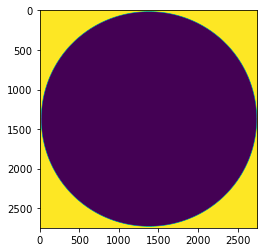

In [2]:
import matplotlib.pyplot as plt
plt.imshow(dataset['CFR'])

In [3]:
values = dataset['CFR']
values

<xarray.DataArray 'CFR' (x: 2748, y: 2748)>
array([[65535., 65535., 65535., ..., 65535., 65535., 65535.],
       [65535., 65535., 65535., ..., 65535., 65535., 65535.],
       [65535., 65535., 65535., ..., 65535., 65535., 65535.],
       ...,
       [65535., 65535., 65535., ..., 65535., 65535., 65535.],
       [65535., 65535., 65535., ..., 65535., 65535., 65535.],
       [65535., 65535., 65535., ..., 65535., 65535., 65535.]], dtype=float32)
Coordinates:
  * y        (y) float32 0.0 1.0 2.0 3.0 ... 2.745e+03 2.746e+03 2.747e+03
  * x        (x) float32 0.0 1.0 2.0 3.0 ... 2.745e+03 2.746e+03 2.747e+03
Attributes:
    long_name:            FY4B PGS L2 Cloud Coverage Product
    standard_name:        Cloud Coverage Product
    FillValue:            -1.0
    valid_range:          [0. 1.]
    units:                
    resolution:           4KM
    ancillary_variables:  DQF
    Description:          65535:Space

In [4]:
import numpy as np
cfr = np.ma.masked_equal(values.values, 65535) #space value
cfr = np.ma.masked_equal(cfr, -1) #fill value
cfr = xr.DataArray(cfr, dims=('y','x'))
cfr

<xarray.DataArray (y: 2748, x: 2748)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Dimensions without coordinates: y, x

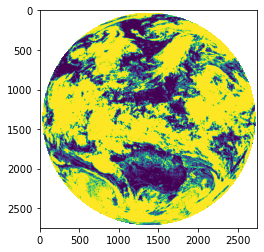

In [5]:
plt.imshow(cfr)

In [6]:
from fy4b import FY4B_AGRI_L2
filepath = 'FY4B/FY4B-_AGRI--_N_DISK_1330E_L2-_CFR-_MULT_NOM_20230509143000_20230509144459_4000M_V0001.NC'
geo_desc = [17, 54, 73, 135, 0.1]
file = FY4B_AGRI_L2(filepath, geo_desc)
cfr = file.extract('CFR')
cfr

<xarray.DataArray (lat: 371, lon: 621)>
array([[0.8611111, 0.7222222, 0.5833333, ..., 1.       , 1.       ,
        1.       ],
       [1.       , 0.9722222, 0.7222222, ..., 1.       , 1.       ,
        1.       ],
       [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       ...,
       [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 54.0 53.9 53.8 53.7 53.6 ... 17.4 17.3 17.2 17.1 17.0
  * lon      (lon) float64 73.0 73.1 73.2 73.3 73.4 ... 134.7 134.8 134.9 135.0

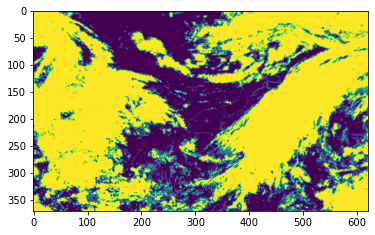

In [7]:
plt.imshow(cfr)